# Previous

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

ad_conversion = pd.read_csv('data/ad_conversion.csv')

ad_conversion['qdrt_n_impressions'] =ad_conversion['n_impressions'] ** 0.25
ad_conversion['qdrt_n_clicks'] =ad_conversion['n_clicks'] ** 0.25

mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions', data=ad_conversion).fit()

print(ad_conversion.head())

   spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks
0       1.43           7350         1            9.259165       1.000000
1       1.82          17861         2           11.560495       1.189207
2       1.25           4259         1            8.078429       1.000000
3       1.29           4133         1            8.018006       1.000000
4       4.77          15615         3           11.178551       1.316074


c:\Users\CIRO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


# Quantifying model fit

In [2]:
mdl_click_vs_impression_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:21:09   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133      0.033       0.135       3.231
n_impressions     0.0002   1.96e-06     87.654      0.000       0.000       0.000
==============================================================================
Omnibus:                      247.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13215.277
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      21.401   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
mdl_click_vs_impression_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:21:09   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
print(mdl_click_vs_impression_orig.rsquared)

print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [5]:
mse_orig = mdl_click_vs_impression_orig.mse_resid
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

mse_trans = mdl_click_vs_impression_trans.mse_resid
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


# visualizing model fit

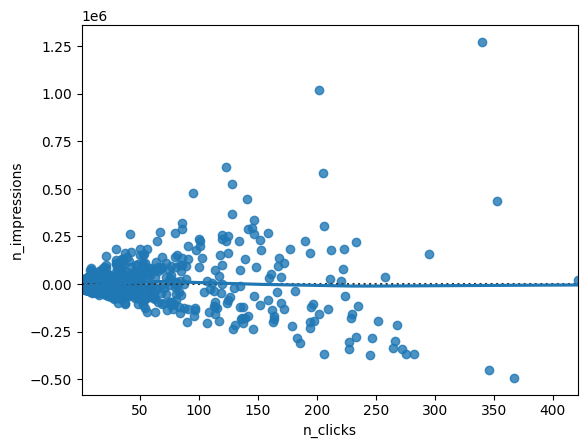

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(x='n_clicks', y ='n_impressions', lowess=True,data=ad_conversion)

plt.show()

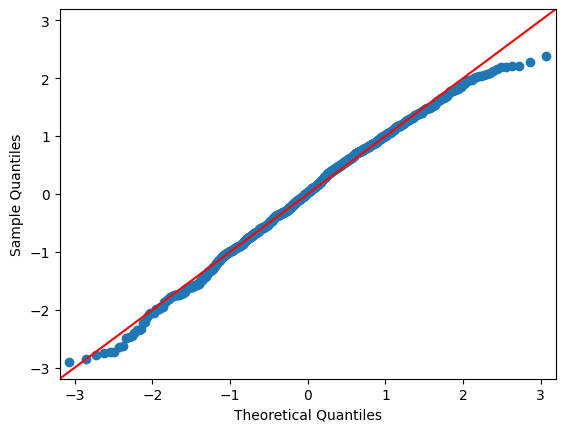

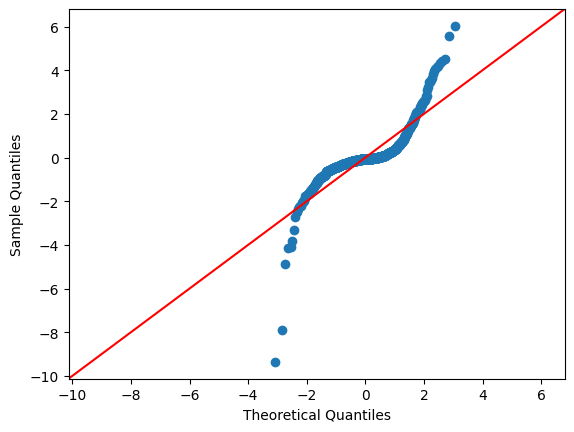

In [7]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data=mdl_click_vs_impression_trans.resid, fit=True, line='45')
qqplot(data=mdl_click_vs_impression_orig.resid, fit=True, line='45')
plt.show()

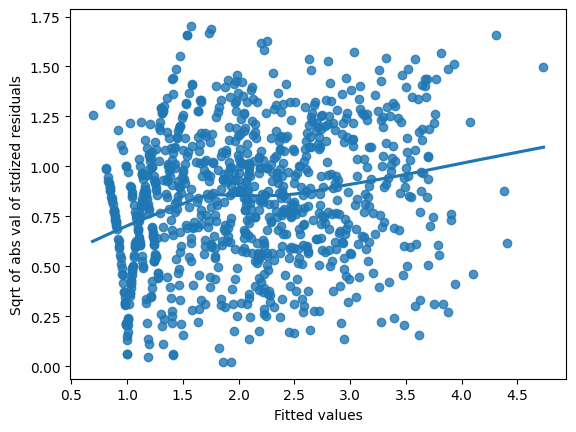

In [11]:
model_norm_residuals = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

# Outliers, leverage, and influence

In [16]:
summary_info = mdl_click_vs_impression_trans.get_influence().summary_frame()
ad_conversion['leverage'] = summary_info['hat_diag']

print(ad_conversion.sort_values('leverage', ascending=False).head())


      spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks  \
329  639.949998        3052003       340           41.797109       4.294076   
562  603.380002        2286228       353           38.884801       4.334547   
656  612.300003        2223278       421           38.614325       4.529711   
332  360.150001        2080666       202           37.979618       3.769970   
663  429.479998        1705246       295           36.136556       4.144341   

     leverage  
329  0.012458  
562  0.009837  
656  0.009611  
332  0.009092  
663  0.007677  


In [17]:
ad_conversion['cooks_dist'] = summary_info['cooks_d']
print(ad_conversion.sort_values('cooks_dist', ascending=False).head())

      spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks  \
332  360.150001        2080666       202           37.979618       3.769970   
329  639.949998        3052003       340           41.797109       4.294076   
328  236.769999        1267550       123           33.553766       3.330246   
819  541.700002        1428421       367           34.571168       4.376899   
788  465.079998        1358324       346           34.139004       4.312896   

     leverage  cooks_dist  
332  0.009092    0.034532  
329  0.012458    0.031810  
328  0.005926    0.018105  
819  0.006584    0.017369  
788  0.006299    0.015461  
